In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
a) Load house sales data from file kc_house_data.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables. Are all of them meaningful?

In [2]:
#a)
#Your code:
import io
from google.colab import files
import csv
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['kc_house_data.csv'].decode('utf-8')))
df.head()

#Hint: read_csv(), head()

Saving kc_house_data.csv to kc_house_data.csv


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#b) 

house_categorical_df = [["id", "date", "waterfront", "view", "condition", "zipcode", "grade"]]
house_numerical_df = df[["bathrooms", "bedrooms", "floors", "lat", "long", "price", "sqft_above", "sqft_basement", "sqft_living", "sqft_living15", "sqft_lot", "sqft_lot15", "yr_built", "yr_renovated"]]

df.columns



Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
#c)
#Your code:

house_numerical_df.describe()

#Hint: Function describe()



,bathrooms,bedrooms,floors,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,yr_built,yr_renovated
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000
mean,2.114757,3.370842,1.494309,47.560053,-122.213896,5.400881e+05,1788.390691,291.509045,2079.899736,1986.552492,1.510697e+04,12768.455652,1971.005136,84.402258
std,0.770163,0.930062,0.539989,0.138564,0.140828,3.671272e+05,828.090978,442.575043,918.440897,685.391304,4.142051e+04,27304.179631,29.373411,401.679240
min,0.000000,0.000000,1.000000,47.155900,-122.519000,7.500000e+04,290.000000,0.000000,290.000000,399.000000,5.200000e+02,651.000000,1900.000000,0.000000
25%,1.750000,3.000000,1.000000,47.471000,-122.328000,3.219500e+05,1190.000000,0.000000,1427.000000,1490.000000,5.040000e+03,5100.000000,1951.000000,0.000000
50%,2.250000,3.000000,1.500000,47.571800,-122.230000,4.500000e+05,1560.000000,0.000000,1910.000000,1840.000000,7.618000e+03,7620.000000,1975.000000,0.000000
75%,2.500000,4.000000,2.000000,47.678000,-122.125000,6.450000e+05,2210.000000,560.000000,2550.000000,2360.000000,1.068800e+04,10083.000000,1997.000000,0.000000
max,8.000000,33.000000,3.500000,47.777600,-121.315000,7.700000e+06,9410.000000,4820.000000,13540.000000,6210.000000,1.651359e+06,871200.000000,2015.000000,2015.000000


Conclusions: Not all of the above data are significant. The year of renovation is 0, so the point is that the building has not been renovated at all. This value disturbs others, such as the average, while 'max' is already correct. Also, the basement area is 0, when there is no one at all.

## Exercise 2
Using scatter plot:  
a) Show the relation of square footage and price.  
b) Check how price is influenced by apartment's grade. Find other variables correlated with price.  
c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located. 

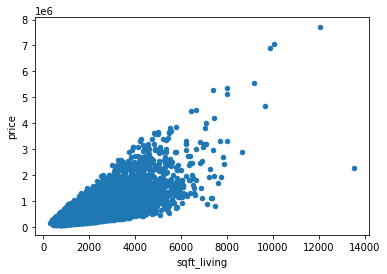

In [5]:
#a)
#Your code:
square_footage_price = df[['sqft_living', 'price']]
square_footage_price.plot.scatter(x='sqft_living', y='price')

#Hint plt.scatter

Conclusions: As we can see from the above scatter plot, the higher square footage, the higher the price of the building. However, surface area is not the only price determining factor as we see large fluctuations especially for higher surfaces. Direction is positive, strenght is weak and there are some outliners.

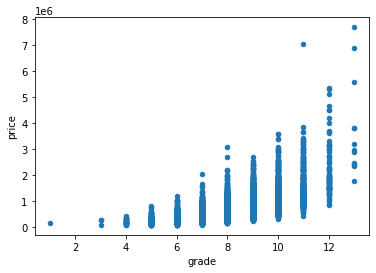

In [6]:
#b)
#Your code:
grade_price_plot = df[['grade', 'price']]
grade_price_plot.plot.scatter(x='grade', y='price')


Conclusions: The higher the grade is, the higher the price of the apartments. There are also some outliners.

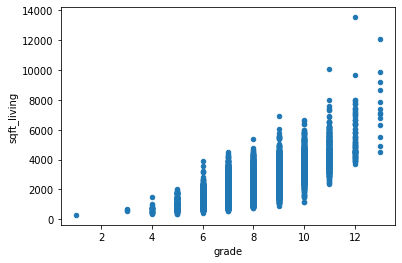

In [7]:
grade_yrbuilt_plot = df[['grade', 'sqft_living']]
grade_yrbuilt_plot.plot.scatter(x='grade', y='sqft_living')

Conclusions: The square footage is also strongly correlated with the grade of flats.

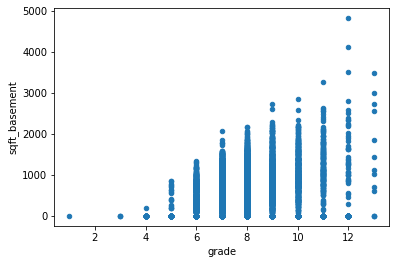

In [8]:
grade_yrbuilt_plot = df[['grade', 'sqft_basement']]
grade_yrbuilt_plot.plot.scatter(x='grade', y='sqft_basement')

Conclusions: There is also a correlation between the square footage of basement and the grade of the apartment. The higher the sqft_basement, the higher the grade.

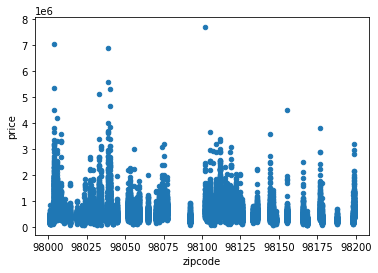

In [9]:
#c)
#Your code:
zipcode_price_plot = df[['zipcode', 'price']]
zipcode_price_plot.plot.scatter(x='zipcode', y='price')


Conclusions: As we can see, there are districts where prices are much lower compared to the rest, as well as districts with more expensive apartments.

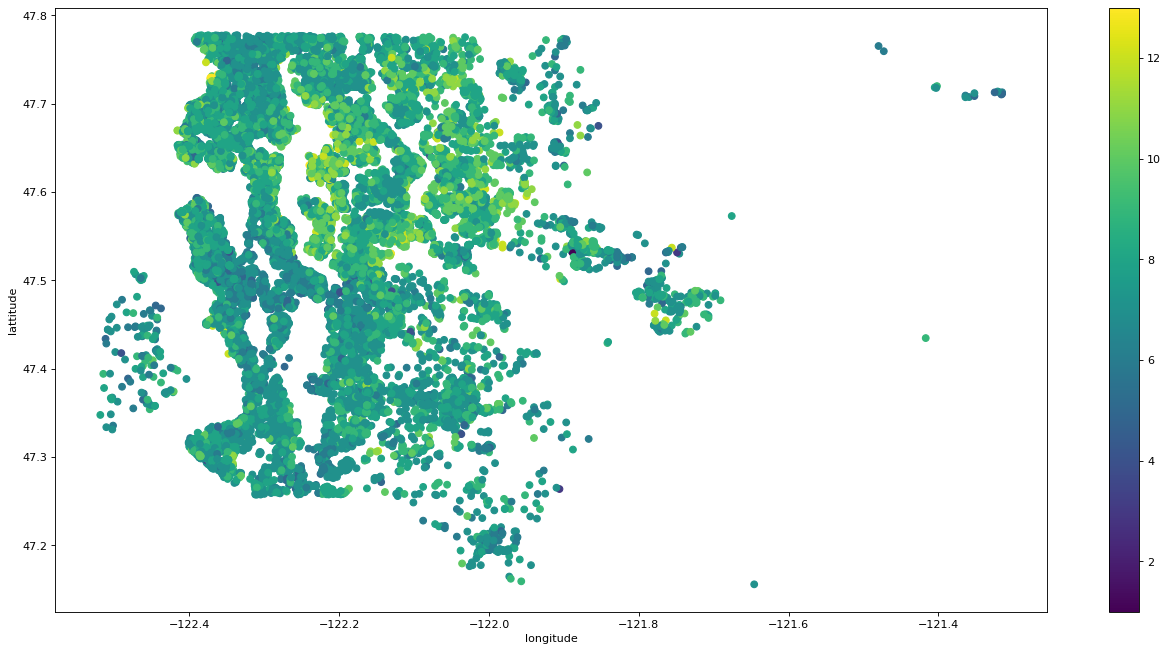

In [11]:
#Your code:

plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(df.long, df.lat, c=df.grade)
plt.xlabel("longitude")
plt.ylabel("lattitude")
plt.colorbar()



Conclusions: According to the scale, it can be seen that apartments with the best rating are located in the city center (many ratings on a scale of 10-12), and outside the city center dominate apartments with lower ratings, but there are also exceptions, because there are single houses with a better rating.

## Exercise 3
a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  
b) Create mosaic plot of any two categorical variables.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


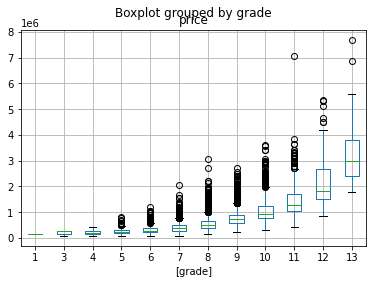

In [12]:
#a)
#Your code:
boxplot_eo = df[['grade', 'price']]

boxplot_eo.boxplot(by='grade')

#Hint: plt.boxplot

Conclusion: This graph shows the same data as graph 2b), but the boxplot allows us to see information about the distribution of these data such as the median or their dispersion. As we can see, most of the houses are in the lower price range, and there are far fewer houses in the higher price range.

(<Figure size 432x288 with 3 Axes>,
 {('3', '1.0'): (0.0, 0.0, 0.4288124984177063, 0.5461699684946868),
  ('3', '2.0'): (0.0,
   0.5494486570192769,
   0.4288124984177063,
   0.3121829444118118),
  ('3', '1.5'): (0.0,
   0.864910289955679,
   0.4288124984177063,
   0.0786965344155498),
  ('3', '3.0'): (0.0,
   0.9468855128958189,
   0.4288124984177063,
   0.040549741015645895),
  ('3', '2.5'): (0.0,
   0.990713942436055,
   0.4288124984177063,
   0.005606877770064615),
  ('3', '3.5'): (0.0,
   0.9995995087307098,
   0.4288124984177063,
   0.0004004912692902751),
  ('2', '1.0'): (0.43352947954978177,
   0.0,
   0.12047256673787353,
   0.6952957947255881),
  ('2', '2.0'): (0.43352947954978177,
   0.6985744832501782,
   0.12047256673787353,
   0.17712045616535993),
  ('2', '1.5'): (0.43352947954978177,
   0.8789736279401283,
   0.12047256673787353,
   0.06486101211689241),
  ('2', '3.0'): (0.43352947954978177,
   0.9471133285816109,
   0.12047256673787353,
   0.043834640057020695),
  ('2'

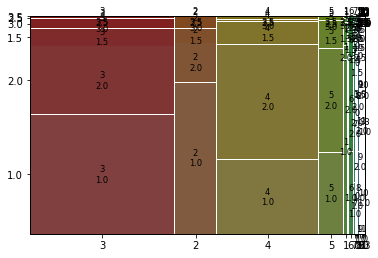

In [13]:
#b)
from statsmodels.graphics.mosaicplot import mosaic

#Your code:
mosaic(df, ['bedrooms', 'floors'])



## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

In [14]:
#a)
#Your code:
stats = df.loc[(df['bedrooms'] == 3) & (df['bathrooms'] == 2) & (df['floors'] == 2)]
stats.describe()

#Hint: pandas.DataFrame.loc

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.540000e+02,1.540000e+02,154.0,154.0,154.000000,154.000000,154.0,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,4.397177e+09,5.144986e+05,3.0,2.0,1850.279221,23678.948052,2.0,0.006494,0.357143,3.435065,7.551948,1717.422078,132.857143,1969.779221,284.863636,98085.577922,47.567376,-122.247091,1802.337662,17545.123377
std,2.849813e+09,2.497661e+05,0.0,0.0,547.585413,83324.024708,0.0,0.080582,0.919495,0.713322,0.832684,527.473851,248.092631,34.654456,700.057328,48.808788,0.143221,0.150507,453.210930,40404.134611
min,7.600057e+06,2.090000e+05,3.0,2.0,1020.000000,700.000000,2.0,0.000000,0.000000,2.000000,6.000000,720.000000,0.000000,1900.000000,0.000000,98001.000000,47.194700,-122.519000,850.000000,886.000000
25%,2.060901e+09,3.769750e+05,3.0,2.0,1452.500000,3414.750000,2.0,0.000000,0.000000,3.000000,7.000000,1402.500000,0.000000,1942.250000,0.000000,98038.500000,47.498800,-122.361750,1452.500000,4020.000000
50%,3.630010e+09,4.640000e+05,3.0,2.0,1700.000000,5868.500000,2.0,0.000000,0.000000,3.000000,7.000000,1625.000000,0.000000,1984.500000,0.000000,98103.000000,47.584750,-122.299500,1725.000000,6278.000000
75%,7.184074e+09,5.894625e+05,3.0,2.0,2127.500000,10800.250000,2.0,0.000000,0.000000,4.000000,8.000000,1977.500000,207.500000,1997.500000,0.000000,98122.000000,47.682400,-122.149250,2117.500000,10392.250000
max,9.829200e+09,1.755000e+06,3.0,2.0,3650.000000,843309.000000,2.0,1.000000,4.000000,5.000000,10.000000,3650.000000,1120.000000,2014.000000,2014.000000,98199.000000,47.777000,-121.709000,3170.000000,273992.000000


Conclusions: We found 154 homes that fulfill the criteria.

Text(0, 0.5, 'price')

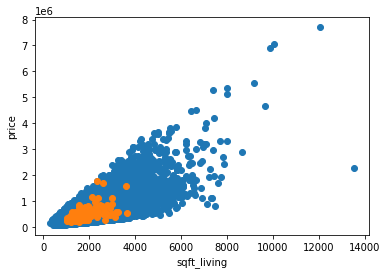

In [15]:
#b)
#Your code:

plt.scatter(df.sqft_living, df.price)
plt.scatter(stats.sqft_living, stats.price)
plt.xlabel("sqft_living")
plt.ylabel("price")


Conclusions: Houses with separate criteria are mainly concentrated in the lower price ranges and the lower square footage range.

In [16]:
#c)
#Your code:

stats['ratio'] = stats['price'] / stats['sqft_living']
stats.sort_values('ratio')
#Hint: .loc, .sort_values(), .index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ratio
9704,7452500565,20140829T000000,260000.0,3,2.0,2710,5000,2.0,0,0,...,2710,0,1951,0,98126,47.5188,-122.373,850,5000,95.940959
11258,7937600262,20140710T000000,379900.0,3,2.0,3110,44967,2.0,0,0,...,3020,90,1999,0,98058,47.4343,-122.082,2150,44967,122.154341
19880,3832050860,20150319T000000,210000.0,3,2.0,1580,4961,2.0,0,0,...,1580,0,2006,0,98042,47.3338,-122.053,2280,5000,132.911392
16014,5104450440,20141113T000000,252500.0,3,2.0,1810,10684,2.0,0,0,...,1810,0,1987,0,98058,47.4619,-122.153,2140,9657,139.502762
20906,3355400242,20141028T000000,274900.0,3,2.0,1936,6612,2.0,0,0,...,1936,0,2014,0,98001,47.2602,-122.246,1620,21600,141.993802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14379,9829200325,20140617T000000,765000.0,3,2.0,1570,7000,2.0,0,2,...,1050,520,1971,0,98122,47.6061,-122.286,1990,6675,487.261146
13853,6795100330,20140625T000000,1150000.0,3,2.0,2110,18815,2.0,0,0,...,2110,0,1979,0,98075,47.5836,-122.042,2690,21010,545.023697
10527,5318100935,20141020T000000,850000.0,3,2.0,1540,3600,2.0,0,0,...,1540,0,1900,1988,98112,47.6343,-122.283,2970,3600,551.948052
5827,9829200250,20150105T000000,1697000.0,3,2.0,2600,6600,2.0,0,4,...,1930,670,1970,2014,98122,47.6055,-122.285,2670,6270,652.692308


Conclusions: ID of the apartment with the worst price to footage ratio is 9704, and the best ratio is for apartment with 9608 ID.